In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


In [6]:
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))
generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1, 1, (observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [7]:
training_data = np.load('TF_intro.npz')

In [10]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

## For the optimizer, we'll use SGD
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 36.3995
Epoch 2/100
32/32 - 0s - loss: 4.4666
Epoch 3/100
32/32 - 0s - loss: 1.4845
Epoch 4/100
32/32 - 0s - loss: 0.6604
Epoch 5/100
32/32 - 0s - loss: 0.4363
Epoch 6/100
32/32 - 0s - loss: 0.3792
Epoch 7/100
32/32 - 0s - loss: 0.3663
Epoch 8/100
32/32 - 0s - loss: 0.3589
Epoch 9/100
32/32 - 0s - loss: 0.3652
Epoch 10/100
32/32 - 0s - loss: 0.3579
Epoch 11/100
32/32 - 0s - loss: 0.3637
Epoch 12/100
32/32 - 0s - loss: 0.3643
Epoch 13/100
32/32 - 0s - loss: 0.3644
Epoch 14/100
32/32 - 0s - loss: 0.3623
Epoch 15/100
32/32 - 0s - loss: 0.3553
Epoch 16/100
32/32 - 0s - loss: 0.3565
Epoch 17/100
32/32 - 0s - loss: 0.3572
Epoch 18/100
32/32 - 0s - loss: 0.3581
Epoch 19/100
32/32 - 0s - loss: 0.3636
Epoch 20/100
32/32 - 0s - loss: 0.3581
Epoch 21/100
32/32 - 0s - loss: 0.3575
Epoch 22/100
32/32 - 0s - loss: 0.3597
Epoch 23/100
32/32 - 0s - loss: 0.3625
Epoch 24/100
32/32 - 0s - loss: 0.3613
Epoch 25/100
32/32 - 0s - loss: 0.3630
Epoch 26/100
32/32 - 0s - loss: 0

### Extract the weights and bias

In [11]:
model.layers[0].get_weights()

[array([[ 2.0209093],
        [-2.9854586]], dtype=float32),
 array([4.980562], dtype=float32)]

### Extract the outputs (make predictions)

In [13]:
model.predict_on_batch(training_data['inputs']).round()

array([[  7.],
       [ 20.],
       [ -4.],
       [ 18.],
       [-37.],
       [ 41.],
       [-18.],
       [  4.],
       [ -5.],
       [ -0.],
       [-23.],
       [ 20.],
       [  8.],
       [ 16.],
       [ 14.],
       [ 12.],
       [ -8.],
       [ 39.],
       [-34.],
       [ 25.],
       [  0.],
       [-26.],
       [ -8.],
       [  0.],
       [-17.],
       [  2.],
       [ 34.],
       [  3.],
       [  3.],
       [ 26.],
       [-28.],
       [-10.],
       [ 10.],
       [ 24.],
       [-38.],
       [ 12.],
       [-20.],
       [ 10.],
       [ -8.],
       [  8.],
       [ 23.],
       [ -6.],
       [ 23.],
       [ -5.],
       [  1.],
       [ 41.],
       [-12.],
       [ 11.],
       [ 16.],
       [ 28.],
       [ 33.],
       [-19.],
       [-20.],
       [  4.],
       [-18.],
       [ 33.],
       [ 22.],
       [ -5.],
       [ 33.],
       [-33.],
       [  3.],
       [  5.],
       [  6.],
       [ 44.],
       [ 44.],
       [  1.],
       [ -

In [15]:
training_data['targets'].round(1)

array([[  6.1],
       [ 19.7],
       [ -4.3],
       [ 17.8],
       [-37.4],
       [ 41.6],
       [-18.2],
       [  4.6],
       [ -4. ],
       [  0.5],
       [-23.8],
       [ 18.8],
       [  8.8],
       [ 15.5],
       [ 14.9],
       [ 13.4],
       [ -8.1],
       [ 39.9],
       [-34.4],
       [ 24.9],
       [  0.6],
       [-26.5],
       [ -7.6],
       [  1.2],
       [-17.5],
       [  0.5],
       [ 33.5],
       [  3.2],
       [  3.5],
       [ 25.7],
       [-28. ],
       [-10.3],
       [ 10.1],
       [ 23.6],
       [-37.8],
       [ 12.5],
       [-19.4],
       [ 10.7],
       [ -8. ],
       [  8.4],
       [ 22.7],
       [ -5.7],
       [ 23.4],
       [ -4.5],
       [ -0.1],
       [ 41.4],
       [-12.4],
       [ 11.4],
       [ 15.3],
       [ 28.5],
       [ 32.8],
       [-18.4],
       [-20.8],
       [  3.7],
       [-17.3],
       [ 32.7],
       [ 22.7],
       [ -4.2],
       [ 31.8],
       [-32.8],
       [  2.3],
       [  5. ],
       [

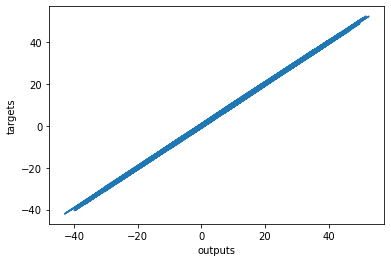

In [16]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show();